# 🏨 **Mission: Save the Hotel Industry with Data!**

## **Introduction**  
Alright, data scientists-in-training! You’ve just been hired as the *Chief Data Analyst* for a group of luxury hotels, and they’ve got a big problem. Guests are booking rooms, but then canceling at the last minute or simply not showing up. The result? Empty rooms, lost revenue, and very unhappy hotel managers.

Your challenge: **Can you analyze the booking data and figure out the patterns behind cancellations?** If you can predict whether a reservation will be honored or canceled, you’ll not only save the hotel chain but also impress your bosses with your data wizardry! No pressure, right?  

The dataset in your hands contains details about hotel reservations—how many nights were booked, whether car parking was requested, the price of rooms, and even special requests. Your task is to clean, analyze, and visualize this data to uncover the secrets behind cancellations. Are you ready to dive into the numbers and help the hotels keep their rooms full? Let’s get to work!  

---

## **Dataset**  
This dataset contains detailed information about hotel reservations. Each row represents a booking, and the columns describe various attributes related to the reservation. Here’s a breakdown of what you’ll find:

- **Booking_ID**: Unique identifier for each booking.  
- **no_of_adults**: Number of adults included in the booking.  
- **no_of_children**: Number of children included in the booking.  
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) booked.  
- **no_of_week_nights**: Number of weekdays (Monday to Friday) booked.  
- **type_of_meal_plan**: The meal plan selected by the customer.  
- **required_car_parking_space**: Whether the guest requested a car parking space (0 = No, 1 = Yes).  
- **room_type_reserved**: Type of room reserved, encoded for privacy.  
- **lead_time**: Number of days between booking and arrival.  
- **arrival_year**: Year of the booking arrival date.  
- **arrival_month**: Month of the booking arrival date.  
- **arrival_date**: Day of the month for the arrival date.  
- **market_segment_type**: The market segment the booking came from (e.g., online, corporate).  
- **repeated_guest**: Whether the guest is a returning customer (0 = No, 1 = Yes).  
- **no_of_previous_cancellations**: Number of previous bookings canceled by the customer.  
- **no_of_previous_bookings_not_canceled**: Number of previous bookings that were not canceled.  
- **avg_price_per_room**: Average price per day for the reservation (in euros).  
- **no_of_special_requests**: Number of special requests made by the guest (e.g., high floor, extra pillows).  
- **booking_status**: Whether the booking was honored or canceled.  

---

## **Timeline**  

Here’s your step-by-step plan for tackling this dataset. Follow it closely and make sure you show your skills at every stage:

1. **Load the dataset into a pandas DataFrame** *(17:15 - 17:20)*  
   - Load the dataset into your notebook and take a look at the first few rows.  
   - Check the data types and identify any missing values.  

2. **Introductory EDA (Exploratory Data Analysis)** *(17:20 - 17:40)*  
   - Perform an initial exploration of the dataset.  
   - Check the distribution of key variables like `avg_price_per_room`, `lead_time`, and `booking_status`.  
   - Look for patterns or outliers that could impact your analysis.  

3. **Data Treatment and Training Preparation** *(17:45 - 18:00)*  
   - Handle missing values by filling or dropping them.  
   - Encode categorical variables (e.g., `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`).  
   - Normalize or scale numerical features like `avg_price_per_room` and `lead_time` if necessary.  
   - Split the data into training and testing sets.  

4. **Baseline Model** *(18:00 - 18:15)*  
   - Create a baseline model to predict cancellations using a simple classifier (e.g., Logistic Regression, Decision Tree).  
   - This will give you a starting point for model evaluation.  

5. **Model Evaluation** *(18:15 - 18:30)*  
   - Evaluate your baseline model using appropriate metrics such as accuracy, precision, recall, and F1-score.  
   - Create confusion matrices to visualize the performance of your model.  
   - Compare the model's performance on the training and test sets to check for overfitting or underfitting.  

6. **Iterate and Improve** *(18:30 - 19:00)*  
   - Try different models (e.g., Random Forest, Gradient Boosting, or XGBoost) to improve performance.  
   - Fine-tune the hyperparameters of your models to get the best results.  
   - Visualize the performance of the models using ROC curves or AUC scores.  

7. **Final Insights and Presentation** *(19:00 - 19:15)*  
   - Summarize your findings: Which factors are most important for predicting cancellations?  
   - Create compelling visualizations (e.g., bar charts, heatmaps) to present your results.  
   - Prepare a final report with insights and recommendations for the hotel managers.    

**Submit your code no later than 19h25**
---

## **Your Challenge**  
Can you spot the key factors that influence cancellations? Are guests with more special requests more likely to cancel? Does lead time play a role? By the end of this analysis, you should be able to **predict cancellations** and help the hotel chain keep its rooms full.  

Good luck, and may the pandas (library) be with you! 🐼


In [159]:
import pandas as pd

#Load the dataset into your notebook and take a look at the first few rows.
df = pd.read_csv("hotel_reservations.csv")

#Check the data types and identify any missing values.
# Display the first few rows
df.head()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Unique values per column
print("\nUnique Values per Column:")
print(df.nunique())

# Check data types and missing values
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())


Summary Statistics:
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std               

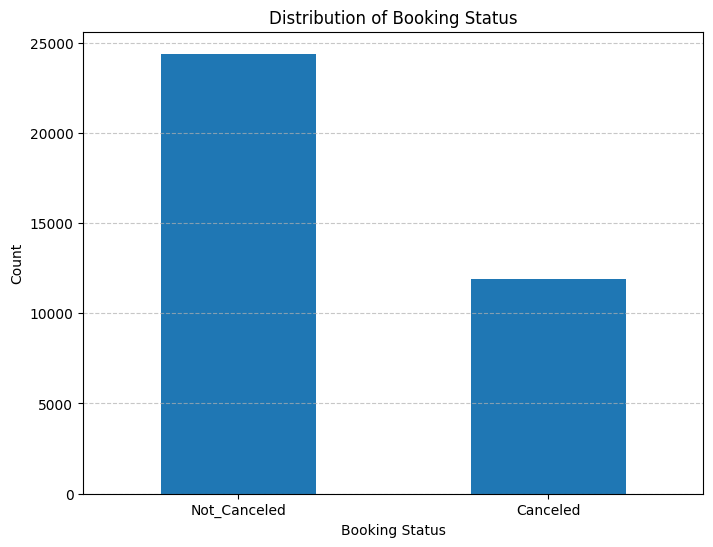


Distribution of Avg Price per Room:
avg_price_per_room
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: count, Length: 3930, dtype: int64

Distribution of Lead Time:
lead_time
0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: count, Length: 352, dtype: int64

Distribution of Booking Status:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [160]:

import matplotlib.pyplot as plt


# Count of each booking status
booking_status_counts = df['booking_status'].value_counts()

# Plot booking status distribution
plt.figure(figsize=(8, 6))
booking_status_counts.plot(kind='bar')
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Check the distribution of key variables like avg_price_per_room, lead_time, and booking_status.
avg_price_per_room_counts = df['avg_price_per_room'].value_counts()
print("\nDistribution of Avg Price per Room:")
print(avg_price_per_room_counts)

lead_time_counts = df['lead_time'].value_counts()
print("\nDistribution of Lead Time:")
print(lead_time_counts)

booking_status_counts = df['booking_status'].value_counts()
print("\nDistribution of Booking Status:")
print(booking_status_counts)



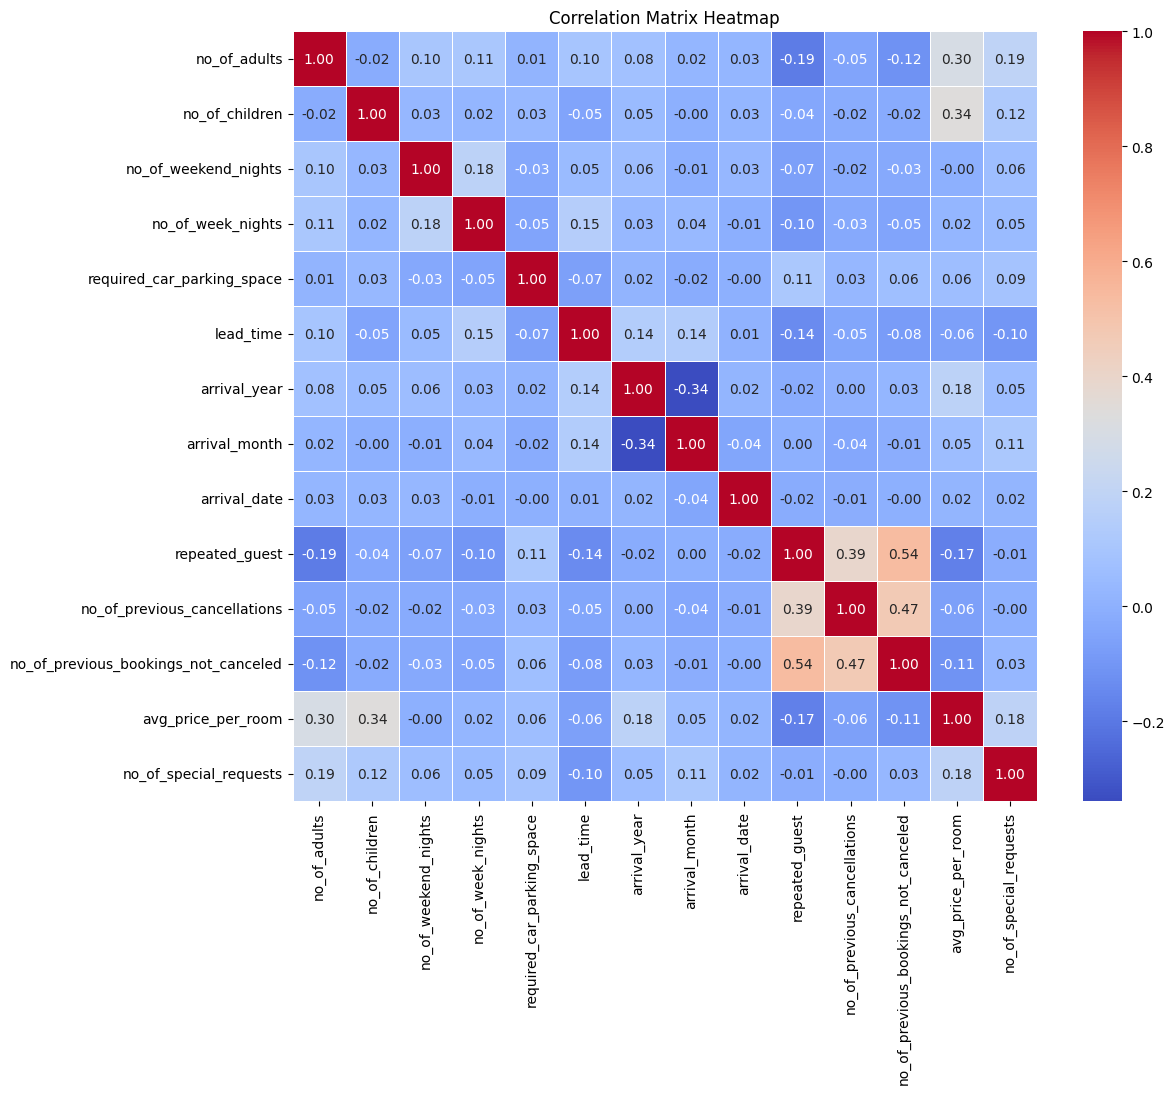

In [161]:
#Correlation heatmap
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

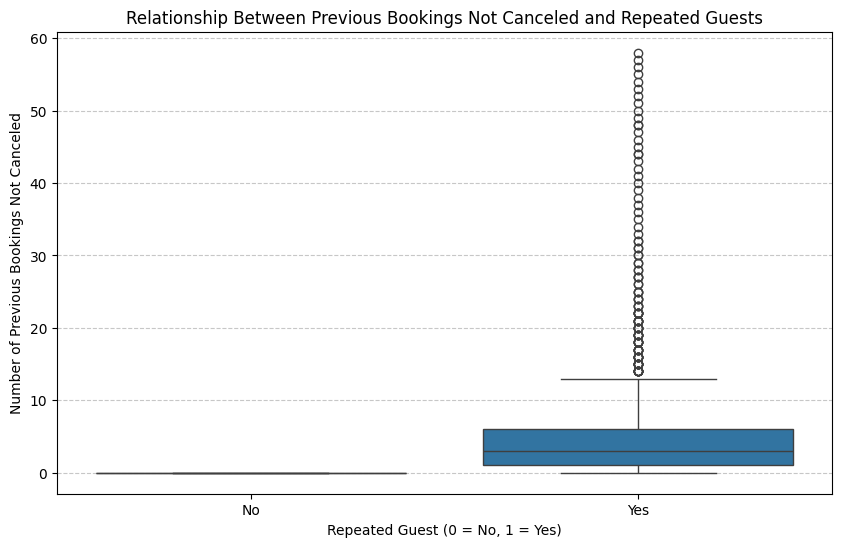

In [162]:
#Looking at the correlation heat map we can see that
#no_of_previous_bookings_not_cancelled and repeated_guests have the highest correlation

# Plot showing the relationship between 'no_of_previous_bookings_not_canceled' and 'repeated_guest'
plt.figure(figsize=(10, 6))
sns.boxplot(x='repeated_guest', y='no_of_previous_bookings_not_canceled', data=df)
plt.title('Relationship Between Previous Bookings Not Canceled and Repeated Guests')
plt.xlabel('Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Number of Previous Bookings Not Canceled')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Repeated Guests (1) tend to have a higher number of previous bookings that were not canceled.
#Non-Repeated Guests (0) generally have very few or zero previous bookings that were not canceled.

In [163]:
#Handle missing values by filling or dropping them.
df = df.dropna()

#Encode categorical variables (e.g., type_of_meal_plan, room_type_reserved, market_segment_type).
df_encoded = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

df_encoded.head()

#Normalize or scale numerical features like avg_price_per_room and lead_time if necessary.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df['avg_price_per_room'] = sklearn.preprocessing.scale(df['avg_price_per_room'])
df['lead_time'] = sklearn.preprocessing.scale(df['lead_time'])


#Split the data into training and testing sets.
X = df.select_dtypes(include=['int64', 'float64','bool'])
Y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [164]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,1.614896,2017,10,2,0,0,0,-1.095033,0
1,2,0,2,3,0,-0.933701,2018,11,6,0,0,0,0.092806,1
2,1,0,2,1,0,-0.980250,2018,2,28,0,0,0,-1.237528,0
3,2,0,0,2,0,1.463610,2018,5,20,0,0,0,-0.097567,0
4,2,0,1,1,0,-0.433291,2018,4,11,0,0,0,-0.254312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,-0.002706,2018,8,3,0,0,0,1.834665,1
36271,2,0,1,3,0,1.661446,2018,10,17,0,0,0,-0.355483,2
36272,2,0,2,6,0,0.730452,2018,7,1,0,0,0,-0.143451,2
36273,2,0,0,3,0,-0.258730,2018,4,21,0,0,0,-0.254312,0


In [165]:
#Create a baseline model to predict cancellations using a simple classifier (e.g., Logistic Regression, Decision Tree)
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter = 100)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

#We want to use recall to analyze the models
print("\nLog Reg")
print("\nRecall:", recall_score(y_test, y_pred_lr, pos_label='Canceled'))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, pos_label='Canceled'))
print("F1-score:", f1_score(y_test, y_pred_lr, pos_label='Canceled'))

Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(X_train, y_train)

y_pred_dt = Decision_tree.predict(X_test)

#We want to use recall to analyze the models
print("\nDecision Tree")
print("\nRecall:", recall_score(y_test, y_pred_dt, pos_label='Canceled'))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, pos_label='Canceled'))
print("F1-score:", f1_score(y_test, y_pred_dt, pos_label='Canceled'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Log Reg

Recall: 0.535182119205298
Accuracy: 0.7809786354238456
Precision: 0.7350767481523593
F1-score: 0.6194011976047904

Decision Tree

Recall: 0.7789735099337748
Accuracy: 0.8563749138525155
Precision: 0.7874476987447698
F1-score: 0.7831876820640865


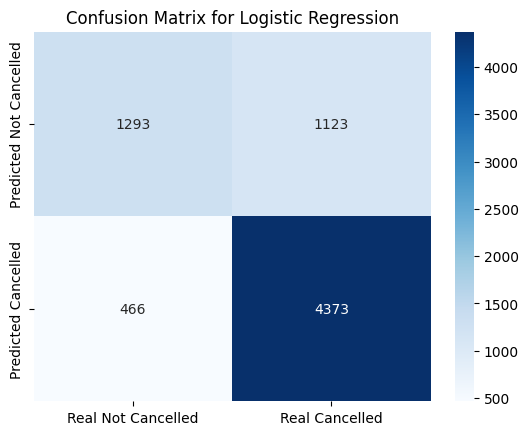

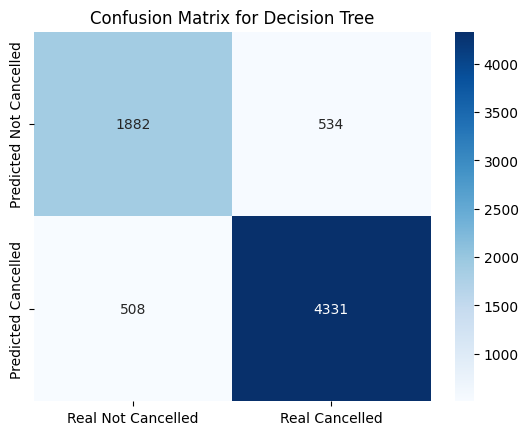

In [166]:
#Create confusion matrices to visualize the performance of your model.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Not Canceled', 'Canceled'])
sns.heatmap(cm_lr,annot=True, fmt='d', cmap='Blues',
          xticklabels = ['Real Not Cancelled', 'Real Cancelled'],
          yticklabels = ['Predicted Not Cancelled', 'Predicted Cancelled'])
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Canceled', 'Canceled'])
sns.heatmap(cm_dt,annot=True, fmt='d', cmap='Blues',
          xticklabels = ['Real Not Cancelled', 'Real Cancelled'],
          yticklabels = ['Predicted Not Cancelled', 'Predicted Cancelled'])
plt.title("Confusion Matrix for Decision Tree")
plt.show()



In [158]:
#Try different models (e.g., Random Forest, Gradient Boosting, or XGBoost) to improve performance.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#Random Forest

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

print("\nRandom Forest")
print("\nRecall:", recall_score(y_test, y_pred_rf, pos_label='Canceled'))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label='Canceled'))
print("F1-Score:", f1_score(y_test, y_pred_rf, pos_label='Canceled'))

#Gradient Boosting

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

y_pred_gb = gradient_boosting.predict(X_test)

print("\nGradient Boosting")
print("\nRecall:", recall_score(y_test, y_pred_gb, pos_label='Canceled'))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb, pos_label='Canceled'))
print("F1-Score:", f1_score(y_test, y_pred_gb, pos_label='Canceled'))

#XGBoost

xgboost = XGBClassifier()
#Cancelled to 1 and Not Cancelled to 0
y_train_numbered = y_train.replace({'Canceled': 0, 'Not_Canceled': 1})
y_test_numbered = y_test.replace({'Canceled': 0, 'Not_Canceled': 1})
xgboost.fit(X_train, y_train_numbered)

y_pred_xgb = xgboost.predict(X_test)

print("\nXGBoost")
print("\nRecall:", recall_score(y_test_numbered, y_pred_xgb, pos_label=1))
print("Accuracy:", accuracy_score(y_test_numbered, y_pred_xgb))
print("Precision:", precision_score(y_test_numbered, y_pred_xgb, pos_label=1))
print("F1-Score:", f1_score(y_test_numbered, y_pred_xgb, pos_label=1))


Random Forest

Recall: 0.7889072847682119
Accuracy: 0.8922122674017918
Precision: 0.8751147842056933
F1-Score: 0.8297779712668698

Gradient Boosting

Recall: 0.6295529801324503
Accuracy: 0.8304617505168849
Precision: 0.8195043103448276
F1-Score: 0.7120786516853933


<ipython-input-158-896801c35c57>:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train_numbered = y_train.replace({'Canceled': 0, 'Not_Canceled': 1})
<ipython-input-158-896801c35c57>:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numbered = y_test.replace({'Canceled': 0, 'Not_Canceled': 1})



XGBoost

Recall: 0.9342839429634222
Accuracy: 0.8764989662301861
Precision: 0.8866444400862914
F1-Score: 0.9098410142885892


In [167]:
# #Fine-tune the hyperparameters of your models to get the best results.
# from sklearn.model_selection import GridSearchCV

# #Tuned Logistic Regression

# logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# logistic_grid = GridSearchCV(log_reg, logistic_params, cv=5)

# logistic_grid.fit(X_train, y_train)

# best_logistic_model = logistic_grid.best_estimator_

# y_pred_best_lr = best_logistic_model.predict(X_test)

# print("\nBest Logistic Regression")
# print("\nRecall:", recall_score(y_test, y_pred_best_lr, pos_label='Canceled'))
# print("Accuracy:", accuracy_score(y_test, y_pred_best_lr))
# print("Precision:", precision_score(y_test, y_pred_best_lr, pos_label='Canceled'))
# print("F1-Score:", f1_score(y_test, y_pred_best_lr, pos_label='Canceled'))


# #Tuned Random Forest

# random_forest_params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1,2,4]
# }
# random_forest_grid = GridSearchCV(random_forest, random_forest_params, cv=5)

# random_forest_grid.fit(X_train, y_train)

# best_random_forest_model = random_forest_grid.best_estimator_

# random_forest_y_pred = best_random_forest_model.predict(X_test)

# print("\nBest Random Forest")
# print("\nRecall:", recall_score(y_test, random_forest_y_pred, pos_label='Canceled'))
# print("Accuracy:", accuracy_score(y_test, random_forest_y_pred))
# print("Precision:", precision_score(y_test, random_forest_y_pred, pos_label='Canceled'))
# print("F1-Score:", f1_score(y_test, random_forest_y_pred, pos_label='Canceled'))








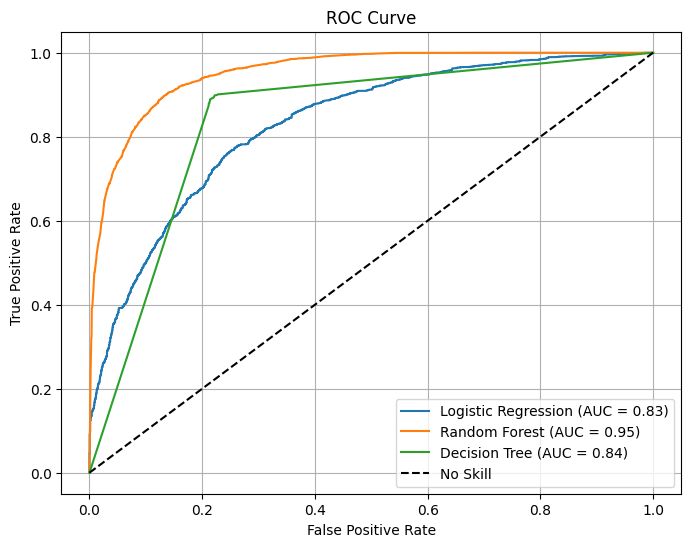

In [168]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
logistic_probs = log_reg.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest.predict_proba(X_test)[:, 1]
decision_tree_probs = Decision_tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
logistic_fpr, logistic_tpr, _ = roc_curve(y_test_numbered, logistic_probs)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test_numbered, random_forest_probs)
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test_numbered, decision_tree_probs)

# Compute AUC scores
logistic_auc = auc(logistic_fpr, logistic_tpr)
random_forest_auc = auc(random_forest_fpr, random_forest_tpr)
decision_tree_auc = auc(decision_tree_fpr, decision_tree_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(random_forest_fpr, random_forest_tpr, label=f'Random Forest (AUC = {random_forest_auc:.2f})')
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree (AUC = {decision_tree_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
